In [8]:
%matplotlib inline

# Packages
import os
import numpy as np
import matplotlib.pyplot as plt

# Keras
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *

# Project Modules
from modules import data
from modules import visualization

## Data

In [9]:
# Models
model_file_path = os.path.join(os.path.dirname("__file__"), 'models/medical_trial_mode.h5')

# Data
train_path = os.path.join(os.path.dirname("__file__"), '../data/cat_or_dog/train')
valid_path = os.path.join(os.path.dirname("__file__"), '../data/cat_or_dog/valid')
test_path = os.path.join(os.path.dirname("__file__"), '../data/cat_or_dog/test')

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog','cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)
#test_batches.class_indices

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [10]:
## Model

In [11]:
# fine tuining of existing model
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.summary()

# Convert model to sequential
model = Sequential()
for layer in vgg16_model.layers:
  model.add(layer)

# Customize last layer

model.layers.pop()

# Locking existing layers; These should not be trained; treat as constant
for layer in model.layers:
  layer.trainable = False

# Add last custom layer on top
model.add(Dense(2, activation='softmax'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## Train

In [12]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 86s - loss: 0.6934 - acc: 0.7000 - val_loss: 0.6962 - val_acc: 0.5000
Epoch 2/5
 - 76s - loss: 0.6860 - acc: 0.7750 - val_loss: 0.6911 - val_acc: 0.6250
Epoch 3/5
 - 78s - loss: 0.6787 - acc: 0.8500 - val_loss: 0.6855 - val_acc: 0.6875
Epoch 4/5
 - 77s - loss: 0.6722 - acc: 0.9250 - val_loss: 0.6800 - val_acc: 0.6875
Epoch 5/5
 - 77s - loss: 0.6667 - acc: 0.9250 - val_loss: 0.6742 - val_acc: 0.8125


## Prediction

Confusion matrix, without normalization
[[5 0]
 [2 3]]


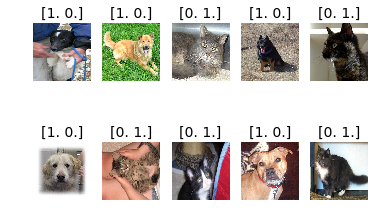

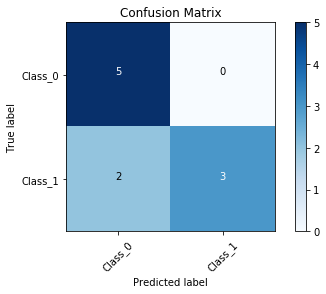

In [14]:
# Plot prediction
test_imgs, test_labels = next(test_batches)
visualization.plotImages(test_imgs, test_labels)

# predict
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions = np.round(predictions)

visualization.plotConfusionMatrix(test_labels[:,0], predictions[:,0])

plt.show()